### 1. Importing the relevant libraries

In [1]:
# CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [2]:
# CODE HERE
data = pd.read_csv('linear.csv')

#### Let's explore the top 5 rows of the df


In [3]:
# CODE HERE
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Let's explore the datatype of each column


In [4]:
data.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

#### `numerical variables`

In [5]:
# CODE HERE
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### `categorical variables`

In [6]:
# CODE HERE
data.describe(include='object')

,Brand,Body,Engine Type,Registration,Model
count,4345,4345,4345,4345,4345
unique,7,6,4,2,312
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,936,1649,2019,3947,199


### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

#### `number of missing values in column`

In [7]:
# CODE HERE
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

#### `percentages of missing values in column`

In [8]:
# CODE HERE
(data.isnull().sum() / data.shape[0] ) * 100

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Model           0.000000
dtype: float64

#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

In [9]:
data.dropna(axis = 0,how='any',inplace=True)  # delete row which contain null values

In [10]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

#### 6. Let's check the descriptives without the missing values


In [11]:
# CODE HERE
data.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### `Both the columns that have missing values are of numerical datatype`

### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

### Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

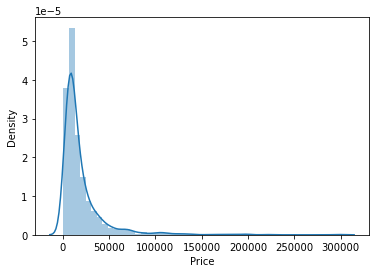

In [12]:
sns.distplot(data['Price'])

### Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

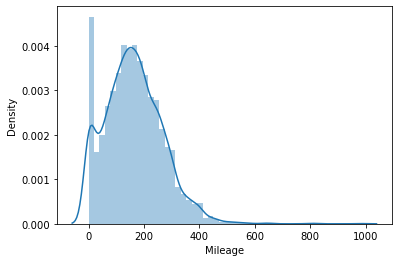

In [13]:
sns.distplot(data['Mileage'])

### EngineV

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

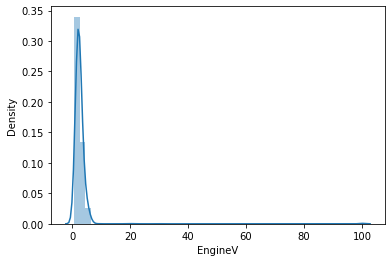

In [14]:
sns.distplot(data['EngineV'])

### Dealing with outliers
Hint: **Use IQR or Z Score**

### `I am using IQR technique below but will also try z technique at the end `

#### 8A. Identify the Outliers which are presented in `Price` Column

<AxesSubplot:xlabel='Price'>

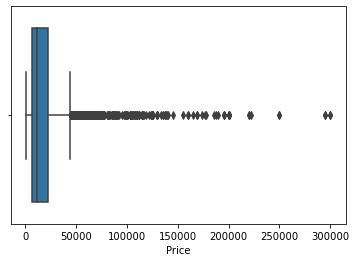

In [15]:
# CODE HERE
sns.boxplot(data['Price'])

In [16]:
q1=np.percentile(data['Price'],25)
q3=np.percentile(data['Price'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:-15352.5 and Upper Bound:44251.5


In [17]:
data[data['Price'] > upper_bound]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
37,BMW,67500.0,crossover,1,2.5,Diesel,yes,2016,X5
41,Mercedes-Benz,63000.0,crossover,86,5.5,Petrol,yes,2009,G 55 AMG
62,BMW,133000.0,crossover,7,4.4,Petrol,yes,2015,X5 M
64,Mercedes-Benz,50000.0,sedan,240,3.5,Petrol,yes,2006,S 350
...,...,...,...,...,...,...,...,...,...
4318,Mercedes-Benz,300000.0,other,37,5.0,Petrol,yes,2012,G 500
4322,Toyota,100000.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200
4327,Audi,80999.0,crossover,0,3.0,Diesel,yes,2016,Q7
4331,BMW,45000.0,crossover,80,3.0,Petrol,yes,2011,X6


#### 8B. Remove the Outliers which are presented in `Price` Column

In [18]:
# CODE HERE
data = data[data['Price'] <= upper_bound]   # remove outliers
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

<AxesSubplot:xlabel='Price', ylabel='Density'>

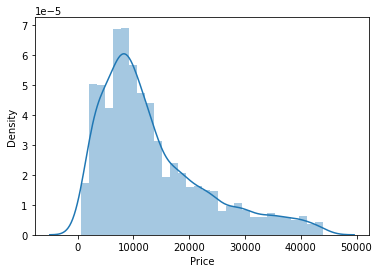

In [19]:
# CODE HERE
sns.distplot(data['Price'])

#### 9A. Same identify and remove the outliers in `Milage` column

<AxesSubplot:xlabel='Mileage'>

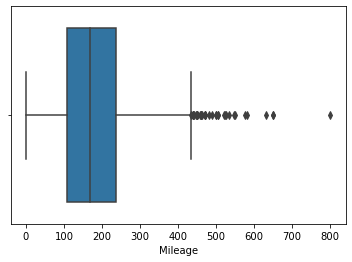

In [20]:
# CODE HERE
sns.boxplot(data['Mileage'])

In [21]:
q1=np.percentile(data['Mileage'],25)
q3=np.percentile(data['Mileage'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:-87.0 and Upper Bound:433.0


In [22]:
data[data['Mileage'] > upper_bound].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
258,Volkswagen,2500.0,sedan,488,2.0,Petrol,yes,1991,Passat B3
284,Renault,4900.0,van,472,2.5,Diesel,yes,2000,Master
396,Mercedes-Benz,2650.0,sedan,470,2.0,Gas,yes,1985,190
899,Volkswagen,6500.0,other,547,1.9,Diesel,yes,1998,T4 (Transporter)


In [23]:
# CODE HERE
data = data[data['Mileage'] <= upper_bound]   # remove outliers
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,19


#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

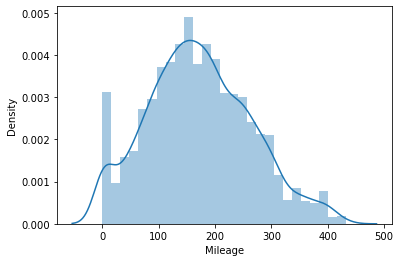

In [24]:
# CODE HERE
sns.distplot(data['Mileage'])

### `Now this variable is Normally Distributed`

#### 10A. Identify and remove the outliers from `EngineV` column



<AxesSubplot:xlabel='EngineV'>

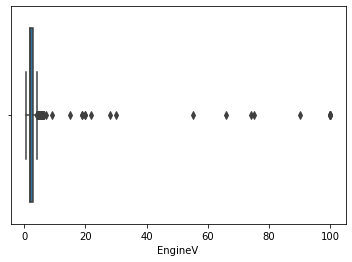

In [25]:
# CODE HERE
# CODE HERE
sns.boxplot(data['EngineV'])

In [26]:
# CODE HERE
q1=np.percentile(data['EngineV'],25)
q3=np.percentile(data['EngineV'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:0.3000000000000005 and Upper Bound:4.299999999999999


In [27]:
data[data['EngineV'] > upper_bound].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
14,Toyota,16000.0,crossover,250,4.7,Gas,yes,2001,Land Cruiser 100
33,BMW,28500.0,crossover,160,4.8,Gas,yes,2008,X5
48,Mercedes-Benz,29500.0,sedan,134,5.0,Petrol,yes,2008,S 500
53,Mercedes-Benz,13500.0,sedan,317,5.0,Petrol,yes,2001,S 500


In [28]:
# CODE HERE
data = data[data['EngineV'] <= upper_bound]   # remove outliers
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,19
12,Audi,9500.0,vagon,165,2.70,Gas,yes,2003,A6 Allroad


#### 10B. Ckeck the distribution plot after deleting the outliers and say something about it.

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

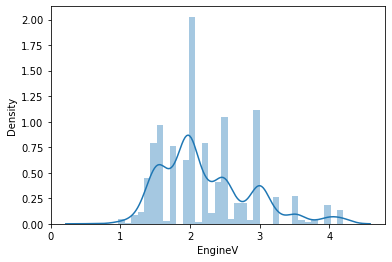

In [29]:
# CODE HERE
sns.distplot(data['EngineV'])

### `Now this variable is near to Normally distributed`

#### 10C. Perform Label & One-Hot Encoding For the Categorical Variable

### `Label Encoding`:

In [33]:
label_encoder = {"yes":1,"no":0}
data["Registration_encoded"] = data["Registration"].apply(lambda x: label_encoder[x] if x in label_encoder else 2)
data.sample(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Registration_encoded
1829,BMW,7000.0,sedan,227,3.0,Diesel,no,2004,730,0
2280,Volkswagen,5800.0,sedan,200,1.4,Petrol,yes,2000,Golf IV,1
87,Audi,18500.0,sedan,245,3.0,Diesel,yes,2006,A8,1
3633,Toyota,42500.0,crossover,50,3.0,Diesel,yes,2012,Land Cruiser Prado,1
420,Audi,16300.0,vagon,180,3.2,Petrol,yes,2006,A6 Allroad,1
3998,Toyota,10400.0,sedan,144,1.3,Petrol,yes,2012,Corolla,1
1083,Toyota,18999.0,crossover,153,2.7,Gas,yes,2006,Land Cruiser Prado,1
3404,Audi,17000.0,crossover,127,3.0,Diesel,no,2013,Q7,0
3402,BMW,14300.0,sedan,217,3.0,Diesel,yes,2005,530,1
3158,Mitsubishi,8300.0,crossover,161,2.0,Petrol,yes,2005,Outlander,1


### `One hot Encoding`:

In [45]:
# Using get_dummies method in pandas
df_ohe = data.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'Engine' ,columns=['Engine Type'],drop_first=False)
one_hot_1.insert(loc=2, column='Engine Type', value=data['Engine Type'].values)
one_hot_1

,Brand,Price,Engine Type,Body,Mileage,EngineV,Registration,Year,Model,Registration_encoded,Engine_Diesel,Engine_Gas,Engine_Other,Engine_Petrol
0,BMW,4200.0,Petrol,sedan,277,2.0,yes,1991,320,1,0,0,0,1
1,Mercedes-Benz,7900.0,Diesel,van,427,2.9,yes,1999,Sprinter 212,1,1,0,0,0
3,Audi,23000.0,Petrol,crossover,240,4.2,yes,2007,Q7,1,0,0,0,1
4,Toyota,18300.0,Petrol,crossover,120,2.0,yes,2011,Rav 4,1,0,0,0,1
7,Audi,14200.0,Diesel,vagon,200,2.7,yes,2006,A6,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,Diesel,van,163,2.5,yes,2008,T5 (Transporter),1,1,0,0,0
4339,Toyota,17900.0,Petrol,sedan,35,1.6,yes,2014,Corolla,1,0,0,0,1
4341,BMW,6500.0,Petrol,sedan,1,3.5,yes,1999,535,1,0,0,0,1
4342,BMW,8000.0,Petrol,sedan,194,2.0,yes,1985,520,1,0,0,0,1


In [52]:
X = one_hot_1.drop('Price',axis=1)
y = one_hot_1['Price']

In [58]:
X = X.drop(['Brand','Engine Type','Body','Year','Model','Registration'],axis=1)

In [60]:
X.columns

Index(['Mileage', 'EngineV', 'Registration_encoded', 'Engine_Diesel',
       'Engine_Gas', 'Engine_Other', 'Engine_Petrol'],
      dtype='object')

### Multicollinearity

#### 11A. Say about Multicollinearity and Find the Multicollinearity variables in the Dataset. 


<AxesSubplot:>

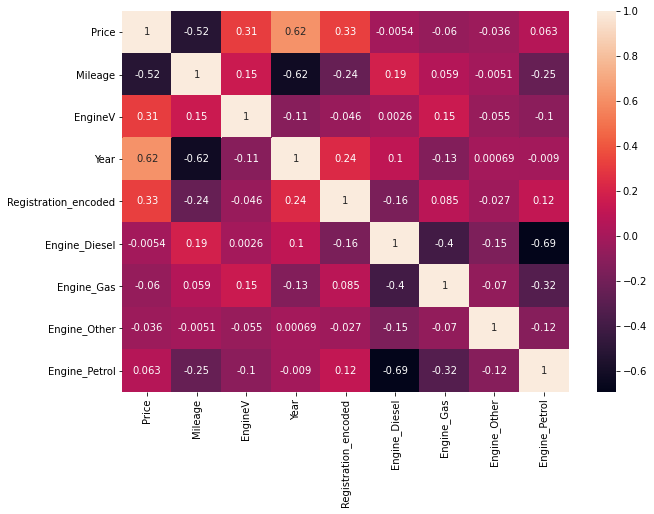

In [65]:
plt.figure(figsize=(10,7))
sns.heatmap(one_hot_1.corr(),annot=True)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check multicollinearity


### function of vif
def cal_vif(X):
    vif=pd.DataFrame()
    vif['var']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)



In [70]:
cal_vif(X)

,var,VIF
0,Mileage,1.138906
1,EngineV,1.049628
2,Registration_encoded,1.084602
3,Engine_Diesel,13.383392
4,Engine_Gas,5.893648
5,Engine_Other,1.614200
6,Engine_Petrol,10.081154


#### 11B. Show the variables which are having Multicollinearity.

- **Engine Diesel and Engine Petrol are multicollinearity variables**, correlation of -.69
- **Mileage and Year are multicollinearity variables**, correlation of -.62
> - **Same can be seen from VIF table above**

### Model fit

#### 12A. Perform The Model fit & Model output using OLS 

In [76]:
modelols = smf.ols(formula = "Price~Mileage+EngineV+Registration_encoded+Engine_Diesel+Engine_Gas+Engine_Other+Engine_Petrol", data = one_hot_1).fit()
modelols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     546.7
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:41:31   Log-Likelihood:                -34896.
No. Observations:                3419   AIC:                         6.981e+04
Df Residuals:                    3412   BIC:                         6.985e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1644.3212    489.625      3.358      0.001     684.333    2604.310
Mileage                -53.6500      1.298    -41.347      0.000     -56.194     -51.106
EngineV               5878.2017    176.508     33.303      0.000    5532.129    6224.274
Registration_encoded  7158.3115    382.048     18.737      0.000    6409.245    7907.378
Engine_Diesel         2318.2104    234.620      9.881      0.000    1858.201    2778.219
Engine_Gas           -1431.5943    319.098     -4.486      0.000   -2057.237    -805.952
Engine_Other           480.3929    564.008      0.852      0.394    -625.434    1586.220
Engine_Petrol          277.3123    241.709      1.147      0.251    -196.597     751.222
==============================================================================
Omnibus:                      327.949   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.246
Skew:                           0.629   Prob(JB):                    4.67e-141
Kurtosis:                       4.718   Cond. No.                     1.69e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.55e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 12B. Explain the Model Evaluation metrics in OLS method.

**Note:** Give The Explanation about R-square, Adjusted.R-Square and Explain the P-Value in OLS Table

#### 13A. Feature Selection using with Forward Selection

In [31]:
#CODE HERE

In [32]:
###Interpretations

#### 13B. Feature Selection using with Backward Selection

In [33]:
###CODEHERE

In [34]:
###Interpretations

#### 14. Explain about Assumption of errors and predictors


In [35]:
###CODEHERE

#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [36]:
###CODEHERE

#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [37]:
###CODEHERE

#### 15C. Explain about Lasso Regression and Perform the Lasso Regression

In [38]:
###CODEHERE

#### 15D. Explain about Ridge Regression and Perform the Ridge Regression

In [39]:
###CODEHERE

#### 16. Perform Residual Analysis Give The Interpretations.

In [40]:
###CODEHERE

### Give the Conclusions about the Model fits for What you Observe.

In [41]:
### Interpretations